In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
# Load the training data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Basic info
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Preview the data
train_df.head()

Train shape: (2029, 9)
Test shape: (10, 8)


,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2,rule_violation
0,0,Banks don't want you to know this! Click here ...,"No Advertising: Spam, referral links, unsolici...",Futurology,If you could tell your younger self something ...,hunt for lady for jack off in neighbourhood ht...,Watch Golden Globe Awards 2017 Live Online in ...,"DOUBLE CEE x BANDS EPPS - ""BIRDS""\n\nDOWNLOAD/...",0
1,1,SD Stream [ ENG Link 1] (http://www.sportsstre...,"No Advertising: Spam, referral links, unsolici...",soccerstreams,[I wanna kiss you all over! Stunning!](http://...,LOLGA.COM is One of the First Professional Onl...,#Rapper \n🚨Straight Outta Cross Keys SC 🚨YouTu...,[15 Amazing Hidden Features Of Google Search Y...,0
2,2,Lol. Try appealing the ban and say you won't d...,No legal advice: Do not offer or request legal...,pcmasterrace,Don't break up with him or call the cops. If ...,It'll be dismissed: https://en.wikipedia.org/w...,Where is there a site that still works where y...,Because this statement of his is true. It isn'...,1
3,3,she will come your home open her legs with an...,"No Advertising: Spam, referral links, unsolici...",sex,Selling Tyrande codes for 3€ to paypal. PM. \n...,tight pussy watch for your cock get her at thi...,NSFW(obviously) http://spankbang.com/iy3u/vide...,Good News ::Download WhatsApp 2.16.230 APK for...,1
4,4,code free tyrande --->>> [Imgur](http://i.imgu...,"No Advertising: Spam, referral links, unsolici...",hearthstone,wow!! amazing reminds me of the old days.Well...,seek for lady for sex in around http://p77.pl/...,must be watch movie https://sites.google.com/s...,We're streaming Pokemon Veitnamese Crystal RIG...,1


In [3]:
train_df['rule_violation'].value_counts(normalize=True)

rule_violation
1    0.508132
0    0.491868
Name: proportion, dtype: float64

In [4]:
print("Unique training rules:", train_df['rule'].nunique())
print("Unique test rules:", test_df['rule'].nunique())

Unique training rules: 2
Unique test rules: 2


In [5]:
train_rules = set(train_df['rule'].unique())
test_rules = set(test_df['rule'].unique())

print("Unseen test rules:", len(test_rules - train_rules))

Unseen test rules: 0


In [6]:
train_df['body_len'] = train_df['body'].apply(lambda x: len(str(x).split()))
train_df['body_len'].describe()

count    2029.000000
mean       27.963036
std        21.230214
min         1.000000
25%        11.000000
50%        22.000000
75%        39.000000
max        97.000000
Name: body_len, dtype: float64

<Axes: title={'center': 'Violation rate per rule'}, ylabel='rule'>

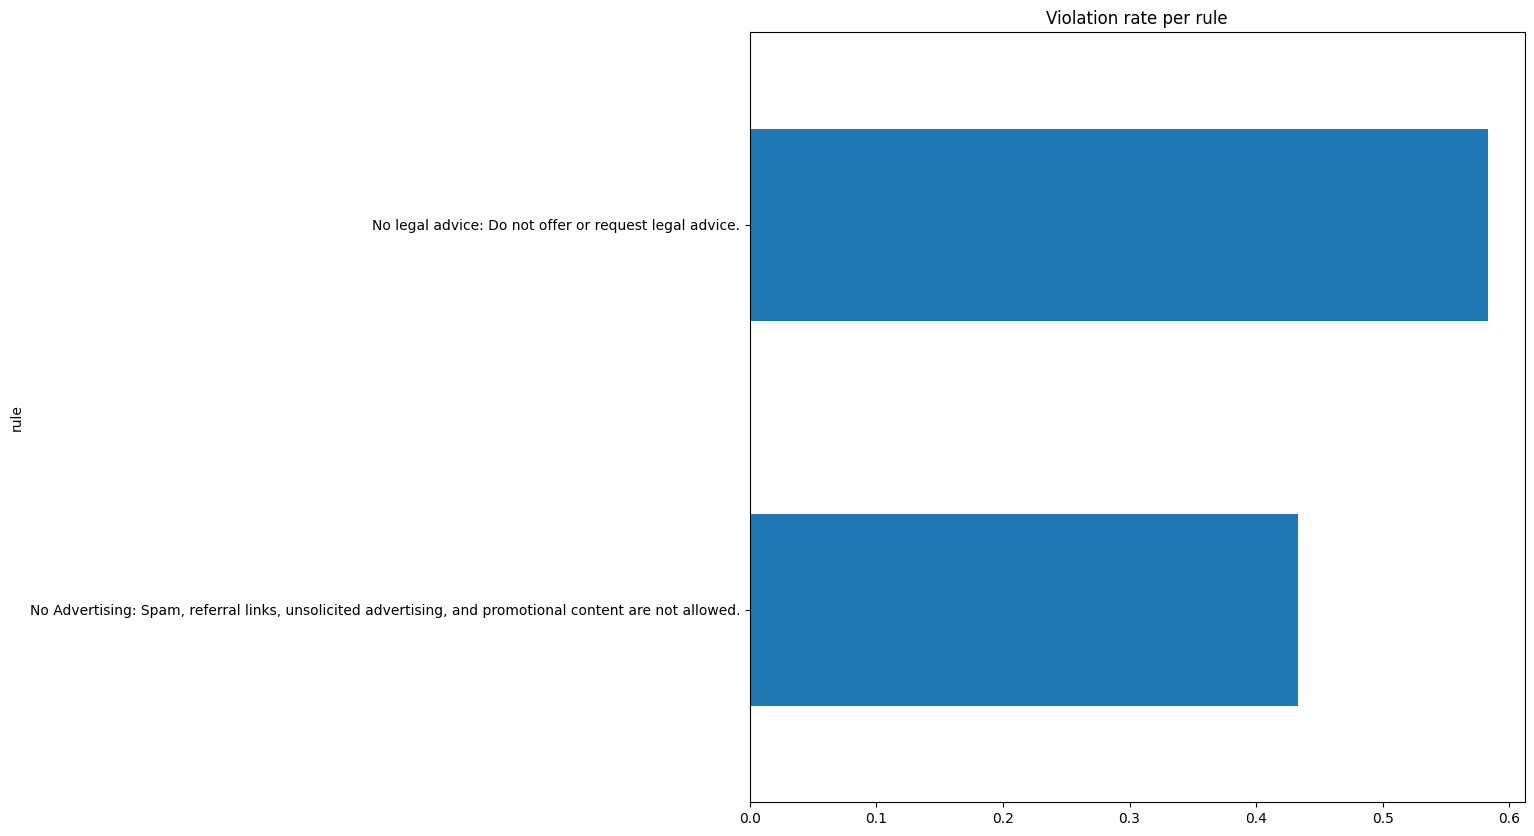

In [7]:
rule_violation_by_rule = train_df.groupby('rule')['rule_violation'].mean().sort_values()
rule_violation_by_rule.plot(kind='barh', figsize=(10, 10), title='Violation rate per rule')

In [8]:
train_df.head()

,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2,rule_violation,body_len
0,0,Banks don't want you to know this! Click here ...,"No Advertising: Spam, referral links, unsolici...",Futurology,If you could tell your younger self something ...,hunt for lady for jack off in neighbourhood ht...,Watch Golden Globe Awards 2017 Live Online in ...,"DOUBLE CEE x BANDS EPPS - ""BIRDS""\n\nDOWNLOAD/...",0,12
1,1,SD Stream [ ENG Link 1] (http://www.sportsstre...,"No Advertising: Spam, referral links, unsolici...",soccerstreams,[I wanna kiss you all over! Stunning!](http://...,LOLGA.COM is One of the First Professional Onl...,#Rapper \n🚨Straight Outta Cross Keys SC 🚨YouTu...,[15 Amazing Hidden Features Of Google Search Y...,0,7
2,2,Lol. Try appealing the ban and say you won't d...,No legal advice: Do not offer or request legal...,pcmasterrace,Don't break up with him or call the cops. If ...,It'll be dismissed: https://en.wikipedia.org/w...,Where is there a site that still works where y...,Because this statement of his is true. It isn'...,1,12
3,3,she will come your home open her legs with an...,"No Advertising: Spam, referral links, unsolici...",sex,Selling Tyrande codes for 3€ to paypal. PM. \n...,tight pussy watch for your cock get her at thi...,NSFW(obviously) http://spankbang.com/iy3u/vide...,Good News ::Download WhatsApp 2.16.230 APK for...,1,12
4,4,code free tyrande --->>> [Imgur](http://i.imgu...,"No Advertising: Spam, referral links, unsolici...",hearthstone,wow!! amazing reminds me of the old days.Well...,seek for lady for sex in around http://p77.pl/...,must be watch movie https://sites.google.com/s...,We're streaming Pokemon Veitnamese Crystal RIG...,1,23


In [9]:
train_df.describe()


,row_id,rule_violation,body_len
count,2029.000000,2029.000000,2029.000000
mean,1014.000000,0.508132,27.963036
std,585.866168,0.500057,21.230214
min,0.000000,0.000000,1.000000
25%,507.000000,0.000000,11.000000
50%,1014.000000,1.000000,22.000000
75%,1521.000000,1.000000,39.000000
max,2028.000000,1.000000,97.000000


In [10]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
import nltk

# Tải lexicon nếu chưa có
# nltk.download("punkt_tab")
# nltk.download('opinion_lexicon')
# nltk.download('punkt')

# Giả sử df có cột 'body' (bình luận) và 'created_utc' (timestamp)


In [11]:
train_df['Length_char'] = train_df['body'].str.len()   # số ký tự
train_df['Length_word'] = train_df['body'].str.split().str.len()   # số từ


In [12]:
negative_words = set(opinion_lexicon.negative())

def count_neg_words(text):
    words = word_tokenize(text.lower())
    return sum(1 for w in words if w in negative_words)

train_df['NegWords'] = train_df['body'].apply(count_neg_words)


In [13]:
def uppercase_ratio(text):
    if len(text) == 0:
        return 0
    num_upper = sum(1 for c in text if c.isupper())
    return num_upper / len(text)

train_df['UpperCaseRatio'] = train_df['body'].apply(uppercase_ratio)


In [14]:
train_df['ContainsLink'] = train_df['body'].str.contains(r'http[s]?://|www\.', regex=True).astype(int)


In [15]:
from transformers import pipeline
import os
# os.environ["TRANSFORMERS_OFFLINE"] = "1"

sentiment_model = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [16]:
def get_sentiment_score(text):
    result = sentiment_model(text)[0]
    label = result['label']   # LABEL_0 (negative), LABEL_1 (neutral), LABEL_2 (positive)
    score = result['score']   # confidence
    if label == "NEGATIVE":
        return -score
    elif label == "POSITIVE":
        return score
    else:
        return 0
train_df['SentimentScore'] = train_df['body'].apply(get_sentiment_score)


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Khởi tạo VADER
analyzer = SentimentIntensityAnalyzer()

def add_vader_scores(df, text_col):
    """
    Thêm 3 cột sentiment score (neg, neu, pos) từ VADER vào DataFrame.
    
    df       : pandas DataFrame
    text_col : tên cột chứa văn bản (str)
    """
    df = df.copy()  # tránh thay đổi DataFrame gốc
    
    df["negScore"] = df[text_col].apply(lambda x: analyzer.polarity_scores(str(x))["neg"])
    df["neuScore"] = df[text_col].apply(lambda x: analyzer.polarity_scores(str(x))["neu"])
    df["posScore"] = df[text_col].apply(lambda x: analyzer.polarity_scores(str(x))["pos"])

    return df


In [18]:
train_df = add_vader_scores(train_df, 'body')

In [19]:
train_df.head()

,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2,rule_violation,body_len,Length_char,Length_word,NegWords,UpperCaseRatio,ContainsLink,SentimentScore,negScore,neuScore,posScore
0,0,Banks don't want you to know this! Click here ...,"No Advertising: Spam, referral links, unsolici...",Futurology,If you could tell your younger self something ...,hunt for lady for jack off in neighbourhood ht...,Watch Golden Globe Awards 2017 Live Online in ...,"DOUBLE CEE x BANDS EPPS - ""BIRDS""\n\nDOWNLOAD/...",0,12,59,12,0,0.033898,0,-0.999523,0.141,0.859,0.000
1,1,SD Stream [ ENG Link 1] (http://www.sportsstre...,"No Advertising: Spam, referral links, unsolici...",soccerstreams,[I wanna kiss you all over! Stunning!](http://...,LOLGA.COM is One of the First Professional Onl...,#Rapper \n🚨Straight Outta Cross Keys SC 🚨YouTu...,[15 Amazing Hidden Features Of Google Search Y...,0,7,91,7,0,0.076923,1,-0.972538,0.000,1.000,0.000
2,2,Lol. Try appealing the ban and say you won't d...,No legal advice: Do not offer or request legal...,pcmasterrace,Don't break up with him or call the cops. If ...,It'll be dismissed: https://en.wikipedia.org/w...,Where is there a site that still works where y...,Because this statement of his is true. It isn'...,1,12,57,12,0,0.035088,0,-0.997785,0.220,0.610,0.171
3,3,she will come your home open her legs with an...,"No Advertising: Spam, referral links, unsolici...",sex,Selling Tyrande codes for 3€ to paypal. PM. \n...,tight pussy watch for your cock get her at thi...,NSFW(obviously) http://spankbang.com/iy3u/vide...,Good News ::Download WhatsApp 2.16.230 APK for...,1,12,75,12,0,0.053333,1,0.997307,0.000,1.000,0.000
4,4,code free tyrande --->>> [Imgur](http://i.imgu...,"No Advertising: Spam, referral links, unsolici...",hearthstone,wow!! amazing reminds me of the old days.Well...,seek for lady for sex in around http://p77.pl/...,must be watch movie https://sites.google.com/s...,We're streaming Pokemon Veitnamese Crystal RIG...,1,23,313,23,0,0.067093,1,-0.997632,0.000,0.754,0.246


In [20]:
train_df = train_df.drop(columns=['row_id'])
train_df.to_csv('data/train_enhanced.csv', index=False)

In [21]:
for col in ['body', 'rule', 'positive_example_1', 'positive_example_2', 'negative_example_1', 'negative_example_2']:
    print(col, "rỗng:", train_df[col].isna().mean(), "unique:", train_df[col].nunique())


body rỗng: 0.0 unique: 1869
rule rỗng: 0.0 unique: 2
positive_example_1 rỗng: 0.0 unique: 458
positive_example_2 rỗng: 0.0 unique: 461
negative_example_1 rỗng: 0.0 unique: 489
negative_example_2 rỗng: 0.0 unique: 493


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

train_df['text'] = train_df['body'] + " [SEP] " + train_df['rule']

all_text = (
    train_df['body'].tolist() +
    train_df['rule'].tolist() + 
    train_df['positive_example_1'].tolist() + train_df['positive_example_2'].tolist() +
    train_df['negative_example_1'].tolist() + train_df['negative_example_2'].tolist()
)

vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=2000,
    token_pattern=r"(?u)\b\w+\b",   # chấp nhận mọi chuỗi chữ/số
    lowercase=True
)

vectorizer.fit(train_df['text'])

X_text = vectorizer.transform(train_df['text']).toarray()
text_features = vectorizer.get_feature_names_out()

# 4.2 Dùng riêng body để tính similarity
tfidf_body = vectorizer.transform(train_df['body'])
tfidf_pos1 = vectorizer.transform(train_df['positive_example_1'])
tfidf_pos2 = vectorizer.transform(train_df['positive_example_2'])
tfidf_neg1 = vectorizer.transform(train_df['negative_example_1'])
tfidf_neg2 = vectorizer.transform(train_df['negative_example_2'])

# === 5. Tính similarity giữa body và các ví dụ ===
sim_to_pos = (
    cosine_similarity(tfidf_body, tfidf_pos1).diagonal() + 
    cosine_similarity(tfidf_body, tfidf_pos2).diagonal()
) / 2

sim_to_neg = (
    cosine_similarity(tfidf_body, tfidf_neg1).diagonal() + 
    cosine_similarity(tfidf_body, tfidf_neg2).diagonal()
) / 2

train_df['sim_to_pos'] = sim_to_pos
train_df['sim_to_neg'] = sim_to_neg
train_df['sim_diff'] = sim_to_neg - sim_to_pos

In [23]:
X_text

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18797304, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(2029, 2000))

In [24]:
X_text_df = pd.DataFrame({
    "text": list(X_text)   # mỗi phần tử là 1 vector numpy
})

In [25]:
# Chọn các biến numeric
from sklearn.discriminant_analysis import StandardScaler


numeric_cols = [
    'body_len', 'Length_char', 'Length_word', 'NegWords',
    'UpperCaseRatio', 'ContainsLink', 'SentimentScore',
    'negScore', 'neuScore', 'posScore',
    'sim_to_pos', 'sim_to_neg', 'sim_diff'
]

X_numeric = train_df[numeric_cols].values
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)
X_numeric_df = pd.DataFrame(X_numeric_scaled, columns=numeric_cols)


In [26]:
X_full = pd.concat([X_numeric_df, X_text_df], axis=1)
X_full.head()

,body_len,Length_char,Length_word,NegWords,UpperCaseRatio,ContainsLink,SentimentScore,negScore,neuScore,posScore,sim_to_pos,sim_to_neg,sim_diff,text
0,-0.752087,-1.037386,-0.752087,-0.646742,-0.191106,-0.869017,-0.562846,0.563729,0.433763,-0.909409,-0.628072,-0.790077,-0.147604,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,-0.987659,-0.755686,-0.987659,-0.646742,0.384107,1.150726,-0.528718,-0.750412,1.352563,-0.909409,-0.079261,0.184014,0.196063,"[0.0, 0.0, 0.0, 0.0, 0.23029190743832842, 0.0,..."
2,-0.752087,-1.054992,-0.752087,-0.646742,-0.175204,-0.869017,-0.560648,1.300021,-1.188798,0.314634,-0.352080,-0.282330,0.038756,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,-0.752087,-0.896536,-0.752087,-0.646742,0.068728,1.150726,1.962496,-0.750412,1.352563,-0.909409,0.137349,-0.535647,-0.503785,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,-0.233830,1.198610,-0.233830,-0.646742,0.252681,1.150726,-0.560455,-0.750412,-0.250449,0.851495,-0.185422,0.028870,0.154770,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [27]:
X_numeric_scaled

array([[-0.75208713, -1.03738579, -0.75208713, ..., -0.62807216,
        -0.79007696, -0.14760447],
       [-0.98765859, -0.7556855 , -0.98765859, ..., -0.07926129,
         0.18401384,  0.19606299],
       [-0.75208713, -1.05499206, -0.75208713, ..., -0.35207964,
        -0.28233013,  0.03875627],
       ...,
       [-0.32805851, -0.20108805, -0.32805851, ..., -0.94080324,
         1.15535332,  1.54868706],
       [ 0.42577016,  0.56478461,  0.42577016, ...,  0.59424917,
        -0.35644693, -0.69572182],
       [ 2.31034183,  2.03490801,  2.31034183, ...,  1.24696794,
         0.32024312, -0.65158545]], shape=(2029, 13))

In [28]:
# X_full = np.hstack([X_numeric_scaled, X_text])
y = train_df['rule_violation'].values

In [29]:
# from sklearn.feature_selection import VarianceThreshold

# selector = VarianceThreshold(threshold=0.0)
# X_reduced = selector.fit_transform(X_full)


In [30]:
X_full

,body_len,Length_char,Length_word,NegWords,UpperCaseRatio,ContainsLink,SentimentScore,negScore,neuScore,posScore,sim_to_pos,sim_to_neg,sim_diff,text
0,-0.752087,-1.037386,-0.752087,-0.646742,-0.191106,-0.869017,-0.562846,0.563729,0.433763,-0.909409,-0.628072,-0.790077,-0.147604,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,-0.987659,-0.755686,-0.987659,-0.646742,0.384107,1.150726,-0.528718,-0.750412,1.352563,-0.909409,-0.079261,0.184014,0.196063,"[0.0, 0.0, 0.0, 0.0, 0.23029190743832842, 0.0,..."
2,-0.752087,-1.054992,-0.752087,-0.646742,-0.175204,-0.869017,-0.560648,1.300021,-1.188798,0.314634,-0.352080,-0.282330,0.038756,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,-0.752087,-0.896536,-0.752087,-0.646742,0.068728,1.150726,1.962496,-0.750412,1.352563,-0.909409,0.137349,-0.535647,-0.503785,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,-0.233830,1.198610,-0.233830,-0.646742,0.252681,1.150726,-0.560455,-0.750412,-0.250449,0.851495,-0.185422,0.028870,0.154770,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,-0.516516,-0.808504,-0.516516,-0.646742,-0.172445,-0.869017,-0.403672,-0.750412,0.531508,-0.007483,0.682565,-0.593091,-0.938101,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2025,0.661342,0.133431,0.661342,-0.646742,-0.435408,-0.869017,-0.550639,0.153642,0.062334,-0.186436,-0.031605,0.024333,0.041069,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2026,-0.328059,-0.201088,-0.328059,-0.646742,1.439230,1.150726,-0.014148,-0.750412,0.577122,-0.057590,-0.940803,1.155353,1.548687,"[0.18797303744555924, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2027,0.425770,0.564785,0.425770,0.655083,-0.366931,-0.869017,-0.561784,-0.107322,0.453312,-0.415497,0.594249,-0.356447,-0.695722,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [31]:
X_numeric_df.isnull().sum()

body_len          0
Length_char       0
Length_word       0
NegWords          0
UpperCaseRatio    0
ContainsLink      0
SentimentScore    0
negScore          0
neuScore          0
posScore          0
sim_to_pos        0
sim_to_neg        0
sim_diff          0
dtype: int64

In [32]:
# import statsmodels.api as sm
# # X_full = X_full.astype(float)

# # Thêm constant (bias term)
# X_sm = sm.add_constant(X_numeric_df)
# logit_model = sm.Logit(y, X_sm)
# result = logit_model.fit(maxiter=2)

# print(result.summary())

In [33]:
# from sklearn.feature_selection import SelectKBest, chi2

# selector = SelectKBest(chi2, k=1000)  # giữ lại 1000 feature mạnh nhất
# X_selected = selector.fit_transform(X_full, y)


In [34]:
X_numeric_df.nunique()


body_len            95
Length_char        406
Length_word         95
NegWords            12
UpperCaseRatio    1026
ContainsLink         2
SentimentScore    1859
negScore           331
neuScore           474
posScore           382
sim_to_pos        1986
sim_to_neg        1926
sim_diff          2015
dtype: int64

In [35]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# X_vif = sm.add_constant(X_numeric_df)
# vif_data = pd.DataFrame()
# vif_data["feature"] = X_vif.columns
# vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
#                    for i in range(X_vif.shape[1])]
# print(vif_data)


In [36]:
X_numeric_df1 = X_numeric_df.drop(columns=['SentimentScore', 'Length_char', 'Length_word', 'posScore', 'sim_to_pos'])

In [37]:
# from sklearn.feature_selection import SelectKBest, chi2

# selector = SelectKBest(chi2, k=10)  # giữ lại 1000 feature mạnh nhất
# X_selected = selector.fit_transform(X_numeric_df, y)


In [38]:
X_full = pd.concat([X_numeric_df1, X_text_df], axis=1)


In [39]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=500, random_state=42)
X_text_reduced = svd.fit_transform(X_text)
X_text_reduced_df = pd.DataFrame(X_text_reduced, columns=[f'svd_{i}' for i in range(X_text_reduced.shape[1])])

In [40]:
X_full_df = pd.concat([X_numeric_df1, X_text_reduced_df], axis=1)

In [41]:
X_full_df

,body_len,NegWords,UpperCaseRatio,ContainsLink,negScore,neuScore,sim_to_neg,sim_diff,svd_0,svd_1,...,svd_490,svd_491,svd_492,svd_493,svd_494,svd_495,svd_496,svd_497,svd_498,svd_499
0,-0.752087,-0.646742,-0.191106,-0.869017,0.563729,0.433763,-0.790077,-0.147604,0.366036,-0.110958,...,-0.011675,-0.003897,-0.012299,-0.032532,0.013732,-0.063745,0.038092,0.004658,-0.016832,-0.046853
1,-0.987659,-0.646742,0.384107,1.150726,-0.750412,1.352563,0.184014,0.196063,0.479918,-0.289680,...,0.002388,0.021318,-0.010295,-0.018332,-0.016136,-0.024729,-0.015344,-0.008615,0.009577,-0.041037
2,-0.752087,-0.646742,-0.175204,-0.869017,1.300021,-1.188798,-0.282330,0.038756,0.227870,0.373497,...,-0.019377,-0.004003,0.005148,0.006122,0.045472,-0.026316,-0.025923,-0.030475,-0.000009,0.042323
3,-0.752087,-0.646742,0.068728,1.150726,-0.750412,1.352563,-0.535647,-0.503785,0.504537,-0.178126,...,-0.003265,0.006354,-0.011157,0.008593,-0.017241,-0.005969,0.030390,0.003380,-0.032383,0.022955
4,-0.233830,-0.646742,0.252681,1.150726,-0.750412,-0.250449,0.028870,0.154770,0.348419,-0.149929,...,0.009304,0.030092,0.013299,0.028445,-0.049445,-0.049401,-0.010185,0.001888,-0.019802,0.031577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,-0.516516,-0.646742,-0.172445,-0.869017,-0.750412,0.531508,-0.593091,-0.938101,0.227375,0.346329,...,0.009499,-0.006893,0.011777,-0.003786,-0.000960,-0.021380,-0.014779,-0.008767,-0.006267,0.014630
2025,0.661342,-0.646742,-0.435408,-0.869017,0.153642,0.062334,0.024333,0.041069,0.245369,0.333117,...,-0.024144,0.030094,0.026493,0.041551,0.007540,-0.010217,-0.013057,0.018848,-0.014032,-0.045378
2026,-0.328059,-0.646742,1.439230,1.150726,-0.750412,0.577122,1.155353,1.548687,0.329145,-0.191609,...,-0.009483,-0.000757,0.007469,-0.011247,-0.018047,-0.014525,-0.025093,-0.011033,-0.017160,-0.016566
2027,0.425770,0.655083,-0.366931,-0.869017,-0.107322,0.453312,-0.356447,-0.695722,0.234657,0.322630,...,-0.013250,-0.019231,-0.015978,-0.008491,0.003948,0.002310,0.015940,0.021807,-0.005153,-0.036977


In [42]:
import statsmodels.api as sm
X_sub_const = sm.add_constant(X_full_df)

logit_model = sm.Logit(y, X_sub_const)
result = logit_model.fit_regularized(method='l1', alpha=0.1, maxiter=10)
print(result.summary())


Iteration limit reached    (Exit mode 9)
            Current function value: 0.6423613381900621
            Iterations: 10
            Function evaluations: 10
            Gradient evaluations: 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2029
Model:                          Logit   Df Residuals:                     1520
Method:                           MLE   Df Model:                          508
Date:                Sun, 05 Oct 2025   Pseudo R-squ.:                 0.07358
Time:                        03:05:29   Log-Likelihood:                -1302.7
converged:                      False   LL-Null:                       -1406.1
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const

/home/dinhtanloc/Projects/test_git/.venv/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 453 out of 509 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/home/dinhtanloc/Projects/test_git/.venv/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/home/dinhtanloc/Projects/test_git/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
import statsmodels.api as sm
X_sub_const = sm.add_constant(X_full_df)

probit_model = sm.Probit(y, X_sub_const)
result = probit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.304962
         Iterations 10
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2029
Model:                         Probit   Df Residuals:                     1520
Method:                           MLE   Df Model:                          508
Date:                Sun, 05 Oct 2025   Pseudo R-squ.:                  0.5599
Time:                        03:05:29   Log-Likelihood:                -618.77
converged:                       True   LL-Null:                       -1406.1
Covariance Type:            nonrobust   LLR p-value:                1.738e-109
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9248      0.619      1.495      0.135      -0.288       2.137
body_len        

In [44]:
glm_model = sm.GLM(y, X_sub_const, family=sm.families.Binomial(link=sm.families.links.cloglog()))
result = glm_model.fit()
print(result.summary())


/home/dinhtanloc/Projects/test_git/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The cloglog link alias is deprecated. Use CLogLog instead. The cloglog link alias will be removed after the 0.15.0 release.
  warnings.warn(
/home/dinhtanloc/Projects/test_git/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:989: RuntimeWarning: overflow encountered in exp
  return 1 - np.exp(-np.exp(z))


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2029
Model:                            GLM   Df Residuals:                     1520
Model Family:                Binomial   Df Model:                          508
Link Function:                cloglog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 05 Oct 2025   Deviance:                       45315.
Time:                        03:05:32   Pearson chi2:                 2.22e+18
No. Iterations:                    26   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.389e+14   1.71e+06  -3.15e

/home/dinhtanloc/Projects/test_git/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/home/dinhtanloc/Projects/test_git/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


In [45]:
glm_model = sm.GLM(y, X_sub_const, family=sm.families.Binomial(link=sm.families.links.cloglog()))
result = glm_model.fit()
print(result.summary())


/home/dinhtanloc/Projects/test_git/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The cloglog link alias is deprecated. Use CLogLog instead. The cloglog link alias will be removed after the 0.15.0 release.
  warnings.warn(
/home/dinhtanloc/Projects/test_git/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:989: RuntimeWarning: overflow encountered in exp
  return 1 - np.exp(-np.exp(z))


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2029
Model:                            GLM   Df Residuals:                     1520
Model Family:                Binomial   Df Model:                          508
Link Function:                cloglog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 05 Oct 2025   Deviance:                       45315.
Time:                        03:05:34   Pearson chi2:                 2.22e+18
No. Iterations:                    26   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.389e+14   1.71e+06  -3.15e

/home/dinhtanloc/Projects/test_git/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/home/dinhtanloc/Projects/test_git/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


In [46]:
import statsmodels.api as sm

X_const = sm.add_constant(X_full_df)

# elastic_net với L1_wt=1 → tương đương L1
glm_model = sm.GLM(y, X_const, family=sm.families.Binomial(link=sm.families.links.logit()))
result = glm_model.fit()
print(result.summary())


/home/dinhtanloc/Projects/test_git/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2029
Model:                            GLM   Df Residuals:                     1520
Model Family:                Binomial   Df Model:                          508
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -617.66
Date:                Sun, 05 Oct 2025   Deviance:                       1235.3
Time:                        03:05:35   Pearson chi2:                 2.72e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5403
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5900      1.107      1.

In [47]:
import statsmodels.api as sm
train_df['text'] = train_df['body'] + " [SEP] " + train_df['rule']
X, y = train_df['text'], train_df['rule_violation']
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X)

X_sub_const = sm.add_constant(X_train_tfidf.toarray())

probit_model = sm.Probit(y, X_sub_const)
result = probit_model.fit()
print(result.summary())


/home/dinhtanloc/Projects/test_git/.venv/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2875: RuntimeWarning: invalid value encountered in divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)


Optimization terminated successfully.
         Current function value: nan
         Iterations 10
                          Probit Regression Results                           
Dep. Variable:         rule_violation   No. Observations:                 2029
Model:                         Probit   Df Residuals:                      291
Method:                           MLE   Df Model:                         1737
Date:                Sun, 05 Oct 2025   Pseudo R-squ.:                     nan
Time:                        03:05:57   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -1406.1
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
x1                nan        nan 

In [48]:
from sklearn.linear_model import LogisticRegression

# Giả sử bạn đã fit model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_full_df, y)

# Lấy hệ số
coef = lr.coef_[0]
intercept = lr.intercept_[0]

# Tính p-values approx (dựa trên standard error)
# 1. Tính predicted probabilities
p = lr.predict_proba(X_full_df)[:,1]

# 2. Tính variance-covariance matrix
X_design = np.hstack([np.ones((X_full_df.shape[0],1)), X_full_df.values])
V = np.diag(p*(1-p))
cov_matrix = np.linalg.inv(X_design.T @ V @ X_design)

# 3. Standard errors
se = np.sqrt(np.diag(cov_matrix))

# 4. T-values
t_values = np.hstack([intercept, coef]) / se

# 5. P-values (approximate, normal distribution)
from scipy import stats
p_values = 2 * (1 - stats.norm.cdf(np.abs(t_values)))

# 6. Tạo bảng summary
summary_df = pd.DataFrame({
    "coef": np.hstack([intercept, coef]),
    "std err": se,
    "t": t_values,
    "P>|t|": p_values
}, index=["Intercept"] + X_full_df.columns.tolist())

print(summary_df)

                    coef   std err         t     P>|t|
Intercept      -0.032379  0.669279 -0.048379  0.961414
body_len        0.384060  0.181115  2.120532  0.033961
NegWords       -0.029793  0.102973 -0.289328  0.772330
UpperCaseRatio -0.033439  0.064595 -0.517671  0.604688
ContainsLink    0.113956  0.166439  0.684668  0.493553
...                  ...       ...       ...       ...
svd_495        -0.412813  2.356953 -0.175147  0.860964
svd_496         0.362031  2.376593  0.152332  0.878925
svd_497         0.054881  2.383698  0.023023  0.981632
svd_498         0.071568  2.388165  0.029968  0.976093
svd_499         0.804533  2.381488  0.337828  0.735493

[509 rows x 4 columns]


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
val_preds = lr.predict_proba(X_val_tfidf)[:, 1]
print("Logistic Regression AUC:", roc_auc_score(y_val, val_preds))

NameError: name 'y_train' is not defined

In [ ]:
# from sklearn.linear_model import Ridge
# from sklearn.metrics import roc_auc_score

# ridge = Ridge(alpha=1.0)
# ridge.fit(X_train_tfidf, y_train)
# val_preds_ridge = ridge.predict(X_val_tfidf)

# print("Ridge Regression AUC:", roc_auc_score(y_val, val_preds_ridge))

In [ ]:
import lightgbm as lgb

# Define datasets
lgb_train = lgb.Dataset(X_train_tfidf, label=y_train)
lgb_val = lgb.Dataset(X_val_tfidf, label=y_val)

# Params
params = {
    'objective': 'binary',
    'metric': 'auc',
    'verbosity': -1,
    'boosting_type': 'gbdt'
}

# Use callbacks for early stopping
callbacks = [lgb.early_stopping(stopping_rounds=10)]

# Train
lgb_model = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_val],
    valid_names=["val"],
    callbacks=callbacks
)

In [ ]:
val_preds_lgb = lgb_model.predict(X_val_tfidf, num_iteration=lgb_model.best_iteration)
from sklearn.metrics import roc_auc_score
print("LightGBM AUC:", roc_auc_score(y_val, val_preds_lgb))

In [ ]:
# Combine body and rule just like training
test_df['input'] = test_df['body'] + ' [SEP] ' + test_df['rule']
X_test_tfidf = vectorizer.transform(test_df['input'])

# Predict
test_preds = lgb_model.predict(X_test_tfidf, num_iteration=lgb_model.best_iteration)

# Prepare submission
submission = pd.DataFrame({
    'row_id': test_df['row_id'],
    'rule_violation': test_preds
})

submission.to_csv('submission.csv', index=False)